In [1]:
#env:ml-s7
import numpy as np
import pandas as pd
# from icecream import ic
import subprocess
import json
import os

from matplotlib import pyplot as plt
# import geopandas as gpd
# from shapely.geometry import Polygon
# from shapely.ops import cascaded_union, unary_union
# from shapely import geometry
# from geopy import distance
%matplotlib inline
from scipy import signal
from tqdm import tqdm
# from Bio import Phylo
# import ete3
import itertools
import sklearn

In [2]:
def value_counts_list(lst):
    """
    Computes the frequency count of unique elements in a list and returns a dictionary, sorted by frequency count in
    descending order.

    Args:
    - lst (list): List of elements

    Returns:
    - dict: Dictionary with unique elements as keys and their frequency count as values, sorted by frequency count
    in descending order
    """
    value_counts = {}
    for item in lst:
        if item in value_counts:
            value_counts[item] += 1
        else:
            value_counts[item] = 1
    sorted_value_counts = dict(sorted(value_counts.items(), key=lambda x: x[1], reverse=True))
    return sorted_value_counts

def print_full(x):
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 2000)
    pd.set_option('display.float_format', '{:20,.2f}'.format)
    pd.set_option('display.max_colwidth', None)
    print(x)
    pd.reset_option('display.max_rows')
    pd.reset_option('display.max_columns')
    pd.reset_option('display.width')
    pd.reset_option('display.float_format')
    pd.reset_option('display.max_colwidth')

NameError: name 'lr' is not defined

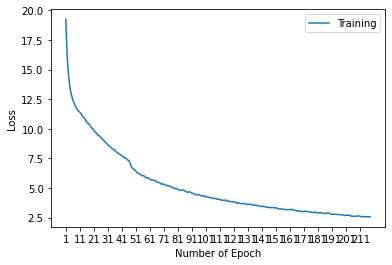

In [4]:
train_epoch_loss = [19.247360229492188,
16.08030891418457,
14.462336540222168,
13.433435440063477,
12.882676124572754,
12.434793472290039,
12.143486976623535,
11.874194145202637,
11.65676498413086,
11.497025489807129,
11.3920316696167,
11.25921630859375,
11.034483909606934,
10.948526382446289,
10.77523136138916,
10.517624855041504,
10.455659866333008,
10.348539352416992,
10.152141571044922,
10.01612663269043,
9.84672737121582,
9.697178840637207,
9.619804382324219,
9.462228775024414,
9.392531394958496,
9.226621627807617,
9.153972625732422,
9.020456314086914,
8.86877727508545,
8.792198181152344,
8.644318580627441,
8.522296905517578,
8.466717720031738,
8.317323684692383,
8.264887809753418,
8.204388618469238,
8.032951354980469,
7.969407081604004,
7.862579345703125,
7.821357250213623,
7.722576141357422,
7.648322105407715,
7.5230631828308105,
7.508515357971191,
7.362423419952393,
7.318562030792236,
7.038177490234375,
6.733860492706299,
6.616921901702881,
6.539867877960205,
6.42012357711792,
6.292505264282227,
6.204397201538086,
6.165633201599121,
6.051218032836914,
6.0284647941589355,
6.012216567993164,
5.8570098876953125,
5.8740105628967285,
5.8299078941345215,
5.732665061950684,
5.683236598968506,
5.662214279174805,
5.639912128448486,
5.600609302520752,
5.479082107543945,
5.458003997802734,
5.4453325271606445,
5.329105854034424,
5.341658592224121,
5.295413017272949,
5.293290615081787,
5.199018955230713,
5.176100254058838,
5.180062770843506,
5.085428237915039,
5.063755035400391,
4.964489459991455,
4.959913730621338,
4.933304309844971,
4.881956577301025,
4.806433200836182,
4.783924102783203,
4.841378688812256,
4.813798427581787,
4.7336907386779785,
4.67471170425415,
4.637126922607422,
4.686183929443359,
4.6409759521484375,
4.551342010498047,
4.539650917053223,
4.457568645477295,
4.420936107635498,
4.410900115966797,
4.457827091217041,
4.373926162719727,
4.306182861328125,
4.353003025054932,
4.2492570877075195,
4.284182071685791,
4.231571197509766,
4.2091803550720215,
4.170181751251221,
4.180907249450684,
4.125584602355957,
4.0836992263793945,
4.1383867263793945,
4.039277076721191,
4.058896541595459,
4.018276214599609,
3.9653425216674805,
3.9743151664733887,
3.9330389499664307,
4.005356788635254,
3.8763022422790527,
3.9017279148101807,
3.874969482421875,
3.8462393283843994,
3.7982354164123535,
3.8596084117889404,
3.7682178020477295,
3.701904296875,
3.7644877433776855,
3.7079412937164307,
3.672682046890259,
3.6851508617401123,
3.698045492172241,
3.6219828128814697,
3.63222074508667,
3.6004316806793213,
3.6355040073394775,
3.591813325881958,
3.60919189453125,
3.5153372287750244,
3.5620415210723877,
3.5535948276519775,
3.477976083755493,
3.485137462615967,
3.450422525405884,
3.4338395595550537,
3.4513533115386963,
3.422213077545166,
3.370917797088623,
3.366527795791626,
3.3624329566955566,
3.3234992027282715,
3.3573286533355713,
3.3390681743621826,
3.3145573139190674,
3.335280179977417,
3.269294023513794,
3.215010166168213,
3.240978717803955,
3.224834680557251,
3.2058217525482178,
3.189802408218384,
3.1612517833709717,
3.1753196716308594,
3.1767513751983643,
3.165804147720337,
3.211061716079712,
3.1243667602539062,
3.125762462615967,
3.0817677974700928,
3.0471103191375732,
3.0869028568267822,
3.0222320556640625,
3.0057713985443115,
3.0222864151000977,
3.0164361000061035,
3.043926954269409,
3.018073081970215,
2.992353677749634,
2.955962896347046,
2.963416576385498,
2.926745891571045,
2.9262664318084717,
2.9723598957061768,
2.884533643722534,
2.909653902053833,
2.899895191192627,
2.907587766647339,
2.898607015609741,
2.8317606449127197,
2.854163646697998,
2.8719675540924072,
2.875185489654541,
2.8684370517730713,
2.7829020023345947,
2.7642858028411865,
2.778266191482544,
2.7804975509643555,
2.7654049396514893,
2.750162124633789,
2.7572245597839355,
2.7567174434661865,
2.7200639247894287,
2.7270476818084717,
2.672367811203003,
2.696871280670166,
2.6996030807495117,
2.6981265544891357,
2.6558966636657715,
2.5985264778137207,
2.6320765018463135,
2.587451696395874,
2.612940549850464,
2.641336679458618,
2.6432671546936035,
2.600700616836548,
2.579648971557617,
2.5584452152252197,
2.5808722972869873,
2.572883129119873,
2.5703272819519043,
2.572782516479492,
2.5555264949798584,] 

fig, ax = plt.subplots()
x = np.arange(1, len(train_epoch_loss)+1, 1)
ax.plot(x, train_epoch_loss,label='Training')
# ax.plot(x, test_epoch_loss,label='Validation')
ax.legend()
ax.set_xlabel("Number of Epoch")
ax.set_ylabel("Loss")
ax.set_xticks(np.arange(1, len(train_epoch_loss)+1, 10))
ax.set_title(f'Loss: Learning_rate:{lr}')
# ax_2 = ax.twinx()
# ax_2.plot(history["lr"], "k--", lw=1)
# ax_2.set_yscale("log")
# ax.set_ylim(ax.get_ylim()[0], history["training_losses"][0])
ax.grid(axis="x")
fig.tight_layout()
fig.show()
fig.savefig(f'./graphs1/loss_lr_{lr}_long.png')
print(f'./graphs1/loss_lr_{lr}.png')

# Data exploration the MIC

In [5]:
df = pd.read_csv('CRyPTIC_reuse_table_20221019.csv')

In [7]:
df1 = pd.read_csv('data1/CRyPTIC_reuse_table_20221019_cleaned.csv')

In [8]:
df1

,UNIQUEID,AMI_BINARY_PHENOTYPE,BDQ_BINARY_PHENOTYPE,CFZ_BINARY_PHENOTYPE,DLM_BINARY_PHENOTYPE,EMB_BINARY_PHENOTYPE,ETH_BINARY_PHENOTYPE,INH_BINARY_PHENOTYPE,KAN_BINARY_PHENOTYPE,LEV_BINARY_PHENOTYPE,...,KAN_PHENOTYPE_QUALITY,LEV_PHENOTYPE_QUALITY,LZD_PHENOTYPE_QUALITY,MXF_PHENOTYPE_QUALITY,RIF_PHENOTYPE_QUALITY,RFB_PHENOTYPE_QUALITY,ENA_SAMPLE,VCF,REGENOTYPED_VCF,wgs_id
0,site.05.subj.PTAN-0001.lab.TAN-001.iso.1,S,S,S,S,S,S,S,S,S,...,HIGH,LOW,HIGH,HIGH,HIGH,HIGH,ERS1987021,00/00/04/90/490/site.05.iso.1.subject.PTAN-000...,00/00/04/90/490/site.05.iso.1.subject.PTAN-000...,ERR2184202
1,site.05.subj.PTAN-0002.lab.TAN-004.iso.1,S,S,S,S,S,S,S,S,S,...,HIGH,HIGH,LOW,LOW,LOW,HIGH,ERS1987022,00/00/04/91/491/site.05.iso.1.subject.PTAN-000...,00/00/04/91/491/site.05.iso.1.subject.PTAN-000...,ERR2184203
2,site.05.subj.PTAN-0003.lab.TAN-006.iso.1,S,S,S,S,S,S,S,S,S,...,HIGH,HIGH,HIGH,LOW,HIGH,HIGH,ERS1987023,00/00/04/92/492/site.05.iso.1.subject.PTAN-000...,00/00/04/92/492/site.05.iso.1.subject.PTAN-000...,ERR2184204
3,site.05.subj.PTAN-0004.lab.TAN-007.iso.1,S,S,S,S,S,NaN,S,S,S,...,HIGH,HIGH,LOW,HIGH,HIGH,HIGH,ERS1987024,00/00/04/93/493/site.05.iso.1.subject.PTAN-000...,00/00/04/93/493/site.05.iso.1.subject.PTAN-000...,ERR2184205
4,site.05.subj.PTAN-0005.lab.TAN-010.iso.1,S,S,S,S,S,S,S,S,S,...,HIGH,HIGH,LOW,HIGH,HIGH,HIGH,ERS1987025,00/00/04/94/494/site.05.iso.1.subject.PTAN-000...,00/00/04/94/494/site.05.iso.1.subject.PTAN-000...,ERR2184206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12280,site.11.subj.XTB_18-071.lab.XTB_18-071.iso.1,S,S,S,S,R,R,R,S,R,...,MEDIUM,MEDIUM,MEDIUM,MEDIUM,MEDIUM,MEDIUM,ERS6421155,00/01/47/01/14701/site.11.iso.1.subject.XTB_18...,00/01/47/01/14701/site.11.iso.1.subject.XTB_18...,SAMEA8741572
12281,site.11.subj.XTB_18-072.lab.XTB_18-072.iso.1,S,S,S,S,I,I,R,S,R,...,MEDIUM,MEDIUM,MEDIUM,MEDIUM,MEDIUM,MEDIUM,ERS6421156,00/01/47/02/14702/site.11.iso.1.subject.XTB_18...,00/01/47/02/14702/site.11.iso.1.subject.XTB_18...,SAMEA8741573
12282,site.11.subj.XTB_18-074.lab.XTB_18-074.iso.1,S,S,S,S,I,R,R,R,S,...,MEDIUM,MEDIUM,MEDIUM,MEDIUM,MEDIUM,MEDIUM,ERS6421157,00/01/47/03/14703/site.11.iso.1.subject.XTB_18...,00/01/47/03/14703/site.11.iso.1.subject.XTB_18...,SAMEA8741574
12283,site.11.subj.XTB_18-075.lab.XTB_18-075.iso.1,S,S,S,S,S,R,R,S,S,...,MEDIUM,MEDIUM,MEDIUM,MEDIUM,MEDIUM,MEDIUM,ERS6421158,00/01/47/04/14704/site.11.iso.1.subject.XTB_18...,00/01/47/04/14704/site.11.iso.1.subject.XTB_18...,SAMEA8741575


In [6]:
df.columns

Index(['UNIQUEID', 'AMI_BINARY_PHENOTYPE', 'BDQ_BINARY_PHENOTYPE',
       'CFZ_BINARY_PHENOTYPE', 'DLM_BINARY_PHENOTYPE', 'EMB_BINARY_PHENOTYPE',
       'ETH_BINARY_PHENOTYPE', 'INH_BINARY_PHENOTYPE', 'KAN_BINARY_PHENOTYPE',
       'LEV_BINARY_PHENOTYPE', 'LZD_BINARY_PHENOTYPE', 'MXF_BINARY_PHENOTYPE',
       'RIF_BINARY_PHENOTYPE', 'RFB_BINARY_PHENOTYPE', 'AMI_MIC', 'BDQ_MIC',
       'CFZ_MIC', 'DLM_MIC', 'EMB_MIC', 'ETH_MIC', 'INH_MIC', 'KAN_MIC',
       'LEV_MIC', 'LZD_MIC', 'MXF_MIC', 'RIF_MIC', 'RFB_MIC',
       'AMI_PHENOTYPE_QUALITY', 'BDQ_PHENOTYPE_QUALITY',
       'CFZ_PHENOTYPE_QUALITY', 'EMB_PHENOTYPE_QUALITY',
       'ETH_PHENOTYPE_QUALITY', 'INH_PHENOTYPE_QUALITY',
       'KAN_PHENOTYPE_QUALITY', 'LEV_PHENOTYPE_QUALITY',
       'LZD_PHENOTYPE_QUALITY', 'MXF_PHENOTYPE_QUALITY',
       'RIF_PHENOTYPE_QUALITY', 'RFB_PHENOTYPE_QUALITY', 'ENA_SAMPLE', 'VCF',
       'REGENOTYPED_VCF', 'wgs_id'],
      dtype='object')

In [10]:
for x in ['AMI_PHENOTYPE_QUALITY', 'BDQ_PHENOTYPE_QUALITY',
       'CFZ_PHENOTYPE_QUALITY', 'EMB_PHENOTYPE_QUALITY',
       'ETH_PHENOTYPE_QUALITY', 'INH_PHENOTYPE_QUALITY',
       'KAN_PHENOTYPE_QUALITY', 'LEV_PHENOTYPE_QUALITY',
       'LZD_PHENOTYPE_QUALITY', 'MXF_PHENOTYPE_QUALITY',
       'RIF_PHENOTYPE_QUALITY', 'RFB_PHENOTYPE_QUALITY']:
    print(df[x].value_counts())

HIGH      8970
LOW       1749
MEDIUM    1349
Name: AMI_PHENOTYPE_QUALITY, dtype: int64
HIGH      8533
LOW       2177
MEDIUM    1354
Name: BDQ_PHENOTYPE_QUALITY, dtype: int64
HIGH      7761
LOW       2933
MEDIUM    1351
Name: CFZ_PHENOTYPE_QUALITY, dtype: int64
HIGH      7504
LOW       3296
MEDIUM    1354
Name: EMB_PHENOTYPE_QUALITY, dtype: int64
HIGH      8818
LOW       1956
MEDIUM    1354
Name: ETH_PHENOTYPE_QUALITY, dtype: int64
HIGH      9516
MEDIUM    1350
LOW       1201
Name: INH_PHENOTYPE_QUALITY, dtype: int64
HIGH      9330
LOW       1442
MEDIUM    1354
Name: KAN_PHENOTYPE_QUALITY, dtype: int64
HIGH      7771
LOW       3035
MEDIUM    1353
Name: LEV_PHENOTYPE_QUALITY, dtype: int64
HIGH      7138
LOW       3693
MEDIUM    1354
Name: LZD_PHENOTYPE_QUALITY, dtype: int64
HIGH      6783
LOW       4055
MEDIUM    1352
Name: MXF_PHENOTYPE_QUALITY, dtype: int64
HIGH      8953
LOW       1789
MEDIUM    1355
Name: RIF_PHENOTYPE_QUALITY, dtype: int64
HIGH      10039
MEDIUM     1351
LOW        

In [12]:
df.shape

(12285, 43)

In [5]:
df[['AMI_BINARY_PHENOTYPE',	'BDQ_BINARY_PHENOTYPE',	'CFZ_BINARY_PHENOTYPE']].value_counts()

AMI_BINARY_PHENOTYPE  BDQ_BINARY_PHENOTYPE  CFZ_BINARY_PHENOTYPE
S                     S                     S                       10389
R                     S                     S                         736
S                     S                     R                         363
R                     S                     R                          96
S                     R                     S                          45
                                            R                          38
R                     R                     R                          16
                                            S                           5
dtype: int64

In [5]:
ar = df[['AMI_PHENOTYPE_QUALITY', 'BDQ_PHENOTYPE_QUALITY',
       'CFZ_PHENOTYPE_QUALITY', 'EMB_PHENOTYPE_QUALITY',
       'ETH_PHENOTYPE_QUALITY', 'INH_PHENOTYPE_QUALITY',
       'KAN_PHENOTYPE_QUALITY', 'LEV_PHENOTYPE_QUALITY',
       'LZD_PHENOTYPE_QUALITY', 'MXF_PHENOTYPE_QUALITY',
       'RIF_PHENOTYPE_QUALITY', 'RFB_PHENOTYPE_QUALITY']].values

list_2d = [element for row in ar for element in row]
print(value_counts_list(list_2d))

{'HIGH': 101116, 'LOW': 28082, 'MEDIUM': 16231, nan: 1991}


In [6]:
for x in ['AMI_MIC', 'BDQ_MIC','CFZ_MIC', 'DLM_MIC', 'EMB_MIC', 'ETH_MIC', 'INH_MIC', 'KAN_MIC',
       'LEV_MIC', 'LZD_MIC', 'MXF_MIC', 'RIF_MIC', 'RFB_MIC']:
    print(df[x].value_counts())

<=0.25    7072
0.5       3510
1          604
>8         393
>16        286
2           94
16          42
4           35
8           32
Name: AMI_MIC, dtype: int64
0.03       4156
0.06       3815
<=0.015    1477
0.015      1053
0.12        790
<=0.008     420
0.25        244
0.5          65
1            28
>2            8
>1            5
2             3
Name: BDQ_MIC, dtype: int64
<=0.06    3986
0.12      2745
0.06      2170
<=0.03    1408
0.25      1211
0.5        339
1          126
2           37
4            9
>4           8
>2           6
Name: CFZ_MIC, dtype: int64
<=0.015    4811
<=0.008    2889
0.015      1787
0.03       1373
0.06        639
0.12        238
0.25         53
>1           51
0.5          40
>0.5         30
1            12
Name: DLM_MIC, dtype: int64
1         4039
2         2988
4         1559
8         1421
0.5       1140
>8         476
16         270
0.25        93
32          80
<=0.25      44
<=0.06      18
>32         14
0.12        12
Name: EMB_MIC, dtype: int

In [9]:
# Data provided by the user
data = {
    'AMI_MIC': {'<=0.25': 7072, '0.5': 3510, '1': 604, '>8': 393, '>16': 286, '2': 94, '16': 42, '4': 35, '8': 32},
    'BDQ_MIC': {'0.03': 4156, '0.06': 3815, '<=0.015': 1477, '0.015': 1053, '0.12': 790, '<=0.008': 420, '0.25': 244, '0.5': 65, '1': 28, '>2': 8, '>1': 5, '2': 3},
    'CFZ_MIC': {'<=0.06': 3986, '0.12': 2745, '0.06': 2170, '<=0.03': 1408, '0.25': 1211, '0.5': 339, '1': 126, '2': 37, '4': 9, '>4': 8, '>2': 6},
    'DLM_MIC': {'<=0.015': 4811, '<=0.008': 2889, '0.015': 1787, '0.03': 1373, '0.06': 639

df1 = pd.DataFrame(list(data.items()))


SyntaxError: invalid syntax (327152447.py, line 8)

In [8]:
# Data provided by the user
data = {
    '0.5': 21599, '<=0.06': 14544, '2': 13432, '0.25': 13103, '1': 12719, '0.12': 9420,
    '0.06': 8132, '<=0.25': 7382, '<=0.015': 6288, '4': 5803, '0.03': 5529, '>8': 3931,
    '<=1': 3540, '0.05': 3426, '8': 3398, '<=0.008': 3309, '>2': 3157, '>4': 2856,
    '0.015': 2840, '<=0.025': 2458, 'nan': 2356, '<=0.03': 2237, '>1.6': 1647, '1.6': 1426,
    '>16': 1026, '3.2': 890, '<=0.12': 435, '16': 423, '6.4': 373, '0.2': 366, '0.8': 349,
    '0.4': 307, '>12.8': 294, '0.1': 275, '12.8': 255, '32': 80, '>1': 56, '>0.5': 30, '>32': 14
}

# Import pandas and create a DataFrame
import pandas as pd

# Convert the dictionary to a DataFrame
df = pd.DataFrame(list(data.items()), columns=['Key', 'Value'])

df  # Display the first few rows of the DataFrame


,Key,Value
0,0.5,21599
1,<=0.06,14544
2,2,13432
3,0.25,13103
4,1,12719
5,0.12,9420
6,0.06,8132
7,<=0.25,7382
8,<=0.015,6288
9,4,5803


In [7]:
ar = df[['AMI_MIC', 'BDQ_MIC','CFZ_MIC', 'DLM_MIC', 'EMB_MIC', 'ETH_MIC', 'INH_MIC', 'KAN_MIC',
       'LEV_MIC', 'LZD_MIC', 'MXF_MIC', 'RIF_MIC', 'RFB_MIC']].values

list_2d = [element for row in ar for element in row]
print(np.unique(list_2d))
print(value_counts_list(list_2d))

['0.015' '0.03' '0.05' '0.06' '0.1' '0.12' '0.2' '0.25' '0.4' '0.5' '0.8'
 '1' '1.6' '12.8' '16' '2' '3.2' '32' '4' '6.4' '8' '<=0.008' '<=0.015'
 '<=0.025' '<=0.03' '<=0.06' '<=0.12' '<=0.25' '<=1' '>0.5' '>1' '>1.6'
 '>12.8' '>16' '>2' '>32' '>4' '>8' 'nan']
{'0.5': 21599, '<=0.06': 14544, '2': 13432, '0.25': 13103, '1': 12719, '0.12': 9420, '0.06': 8132, '<=0.25': 7382, '<=0.015': 6288, '4': 5803, '0.03': 5529, '>8': 3931, '<=1': 3540, '0.05': 3426, '8': 3398, '<=0.008': 3309, '>2': 3157, '>4': 2856, '0.015': 2840, '<=0.025': 2458, nan: 2356, '<=0.03': 2237, '>1.6': 1647, '1.6': 1426, '>16': 1026, '3.2': 890, '<=0.12': 435, '16': 423, '6.4': 373, '0.2': 366, '0.8': 349, '0.4': 307, '>12.8': 294, '0.1': 275, '12.8': 255, '32': 80, '>1': 56, '>0.5': 30, '>32': 14}


['<=0.008', '<=0.015', '0.015', '<=0.025', '0.03', '<=0.03', '0.05', '0.06', '<=0.06', '0.1', '0.12', '<=0.12', '0.2', '0.25', '<=0.25', '0.4', '<=1', '>0.5', '>1', '>1.6', '0.5', '0.8', '>4', '1', '>8', '1.6', '2', '3.2', '4', '6.4', '8', '12.8', '16', '>12.8', '>16', '>32', '>2', '32']


In [7]:
# # below code removes values that are the edge cases of the MIC values
# for i, row in df.iterrows():
#     for x in ['AMI_MIC', 'BDQ_MIC', 'CFZ_MIC', 'DLM_MIC', 'EMB_MIC', 'ETH_MIC', 'INH_MIC', 'KAN_MIC', 'LEV_MIC', 'LZD_MIC', 'MXF_MIC', 'RIF_MIC', 'RFB_MIC']:
#         if row[x] in ['<=0.008', '<=0.015', '<=0.025', '<=0.03', '<=0.06','<=0.12','<=0.25']:
#             df.loc[i, f'{x}'] = '<=0.25'
#         elif row[x] in ['>8', '12.8', '>12.8', '16', '>16', '32', '>32' ]:
#             df.loc[i, f'{x}'] = '>32'
#         elif row[x] in ['>0.5','<=1','>1','>1.6','>2','>4']:
#             df.loc[i, f'{x}'] = float('nan')

In [8]:
# below code removes values that are the edge cases of the MIC values

for i, row in df.iterrows():
    x = 'AMI_MIC'
    if row[x] == '<=0.25' :
        df.loc[i, f'{x}'] = '0.2'
    elif row[x] == '>16':
        df.loc[i, f'{x}'] = '20'
    elif row[x] == '>8':
        df.loc[i, f'{x}'] = float('nan')
        
    x = 'BDQ_MIC'
    if row[x] == '<=0.015' :
        df.loc[i, f'{x}'] = '0.005'
    elif row[x] == '<=0.008' :
        df.loc[i, f'{x}'] = '0.005'
    elif row[x] == '>1':
        df.loc[i, f'{x}'] = '3'    
    elif row[x] == '>2':
        df.loc[i, f'{x}'] = '3'
        
    x = 'CFZ_MIC'
    if row[x] == '<=0.06' :
        df.loc[i, f'{x}'] = '0.02'
    elif row[x] == '<=0.03':
        df.loc[i, f'{x}'] = '0.02'
    elif row[x] == '>2': #! there is middle value between two ranges
        df.loc[i, f'{x}'] = '5'
    elif row[x] == '>4':
        df.loc[i, f'{x}'] = '5'
        
    x = 'DLM_MIC'
    if row[x] == '<=0.015' :
        df.loc[i, f'{x}'] = '0.005'
    elif row[x] == '<=0.008':
        df.loc[i, f'{x}'] = '0.005'
    elif row[x] == '>1':
        df.loc[i, f'{x}'] = '1.5' #! there is middle value between two ranges, should i turn these range values in the middle into nan
    elif row[x] == '>0.5':
        df.loc[i, f'{x}'] = '1.5'
    
    x = 'EMB_MIC'
    if row[x] == '<=0.25' :
        df.loc[i, f'{x}'] = '0.05'
    elif row[x] == '<=0.06' :
        df.loc[i, f'{x}'] = '0.05'
    elif row[x] == '>8':
        df.loc[i, f'{x}'] = '35'
    elif row[x] == '>32':
        df.loc[i, f'{x}'] = '35'     
           
    x = 'ETH_MIC'
    if row[x] == '<=0.25' :
        df.loc[i, f'{x}'] = '0.2'
    elif row[x] == '>8':
        df.loc[i, f'{x}'] = '10'
        
    x = 'INH_MIC'
    if row[x] == '<=0.025' :
        df.loc[i, f'{x}'] = '0.02'
    elif row[x] == '>12.8':
        df.loc[i, f'{x}'] = '13'
    elif row[x] == '>1.6':
        df.loc[i, f'{x}'] = float('nan')         
        
    x = 'KAN_MIC'
    if row[x] == '<=1' :
        df.loc[i, f'{x}'] = '0.5'
    elif row[x] == '>16':
        df.loc[i, f'{x}'] = '20'   

    x = 'LEV_MIC'
    if row[x] == '<=0.12' :
        df.loc[i, f'{x}'] = '0.05'
    elif row[x] == '>8':
        df.loc[i, f'{x}'] = '10'

    x = 'LZD_MIC'
    if row[x] == '<=0.03' :
        df.loc[i, f'{x}'] = '0.03'
    elif row[x] == '<=0.06' :
        df.loc[i, f'{x}'] = '0.03'
    elif row[x] == '>2':
        df.loc[i, f'{x}'] = float('nan')
    elif row[x] == '>4':
        df.loc[i, f'{x}'] = 5                                                                                     

    x = 'MXF_MIC'
    if row[x] == '<=0.06' :
        df.loc[i, f'{x}'] = '0.03'
    elif row[x] == '>4':
        df.loc[i, f'{x}'] = 5    
    
    x = 'RIF_MIC'
    if row[x] == '<=0.06' :
        df.loc[i, f'{x}'] = '0.02'
    elif row[x] == '<=0.03':
        df.loc[i, f'{x}'] = '0.02'    
    elif row[x] == '>8':
        df.loc[i, f'{x}'] = '10'    
        
    x = 'RFB_MIC'
    if row[x] == '<=0.06' :
        df.loc[i, f'{x}'] = '0.03'
    elif row[x] == '>2':
        df.loc[i, f'{x}'] = '3'    

In [9]:
df['RIF_MIC'].unique()

array(['0.02', '0.12', '>4', '4', '2', '0.25', '0.5', nan, '1', '10',
       '0.06', '8'], dtype=object)

In [10]:
ar = df[['AMI_MIC', 'BDQ_MIC','CFZ_MIC', 'DLM_MIC', 'EMB_MIC', 'ETH_MIC', 'INH_MIC', 'KAN_MIC', 'LEV_MIC', 'LZD_MIC', 'MXF_MIC', 'RIF_MIC', 'RFB_MIC']].values

list_2d = [element for row in ar for element in row]
print(value_counts_list(list_2d))

{'0.5': 25139, '0.03': 13828, '2': 13432, '0.25': 13103, '1': 12719, '0.02': 10922, '0.005': 9597, '0.12': 9420, '0.06': 8132, '0.2': 7704, '4': 5803, '0.05': 3923, '8': 3398, '3': 3110, '10': 3062, '0.015': 2840, nan: 2356, '>4': 2243, '1.6': 1426, '20': 1026, '3.2': 890, 5: 605, '35': 490, '16': 423, '6.4': 373, '0.8': 349, '0.4': 307, '13': 294, '0.1': 275, '12.8': 255, '1.5': 81, '32': 80, '5': 14, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, na

In [11]:
drug_names = {
    'AMI': 'Amikacin',
    'BDQ': 'Bedaquiline',
    'CFZ': 'Clofazimine',
    'EMB': 'Ethambutol',
    'ETH': 'Ethionamide',
    'INH': 'Isoniazid', # the critical concentration would be 0.0312 mg/liter for low-level resistance and 0.125 mg/liter for high-level resistance
    'KAN': 'Kanamycin',
    'LEV': 'Levofloxacin',
    'LZD': 'Linezolid',
    'MXF': 'Moxifloxacin',
    'RIF': 'Rifampicin',
    'RFB': 'Rifabutin'
}

In [12]:
# below code removes all MIC values with low quality
for i, row in df.iterrows():
    for x in ['AMI', 'BDQ', 'CFZ', 'EMB', 'ETH', 'INH', 'KAN', 'LEV', 'LZD', 'MXF', 'RIF', 'RFB']:
        if row[f'{x}_PHENOTYPE_QUALITY'] == 'LOW':
            df.loc[i, f'{x}_MIC'] = float('nan')
            # print(df.loc[i, f'{x}_MIC'])

### res data output

In [13]:
# check if the range values are removed
for x in ['AMI', 'BDQ', 'CFZ', 'EMB', 'ETH', 'INH', 'KAN', 'LEV', 'LZD', 'MXF', 'RIF', 'RFB']:
    print(f'{x}_MIC')
    print(df[f'{x}_MIC'].unique())

AMI_MIC
['0.2' '0.5' '1' nan '4' '2' '8' '20' '16']
BDQ_MIC
[nan '0.06' '0.03' '0.25' '0.005' '0.5' '0.12' '3' '0.015' '2' '1']
CFZ_MIC
['0.02' '0.12' nan '0.25' '0.5' '1' '2' '5' '0.06']
EMB_MIC
['1' '2' nan '0.5' '4' '35' '8' '0.25' '0.05' '16' '0.12' '32']
ETH_MIC
['2' '1' '4' '10' nan '0.5' '8' '0.2']
INH_MIC
['0.05' '0.02' '0.2' '0.1' nan '1.6' '0.8' '0.4' '3.2' '12.8' '13' '6.4']
KAN_MIC
['2' '0.5' nan '20' '4' '8' '16']
LEV_MIC
['0.25' '1' '0.5' '0.05' nan '2' '8' '10' '4']
LZD_MIC
['0.25' '0.5' nan '1' '0.12' '0.03' '2' '0.06' '4' 5]
MXF_MIC
['0.25' nan '0.5' '0.12' '2' '4' '1' 5 '0.03']
RIF_MIC
['0.02' '0.12' '>4' nan '4' '2' '0.25' '0.5' '1' '10' '0.06' '8']
RFB_MIC
['0.03' '3' '0.12' '0.5' '2' '0.25' '1' nan]


In [14]:
np.unique(df.iloc[:,14:27].values.tolist())

array(['0.005', '0.015', '0.02', '0.03', '0.05', '0.06', '0.1', '0.12',
       '0.2', '0.25', '0.4', '0.5', '0.8', '1', '1.5', '1.6', '10',
       '12.8', '13', '16', '2', '20', '3', '3.2', '32', '35', '4', '5',
       '6.4', '8', '>4', 'nan'], dtype='<U32')

In [15]:
df.sort_values(by=['wgs_id'], inplace=True)
df.to_csv('CRyPTIC_reuse_table_20221019_cleaned.csv', index=False)

In [ ]:
df

In [ ]:
mic = df.iloc[:,14:27].astype('float')

In [18]:
mic.iloc[:int(mic.shape[0]*0.9),:].to_csv('res_train.csv', index=False)
mic.iloc[int(mic.shape[0]*0.9):,:].to_csv('res_test.csv', index=False)

NameError: name 'mic' is not defined

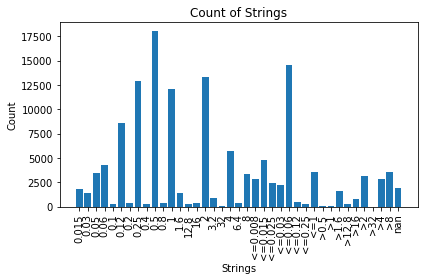

In [147]:
import plotly.graph_objects as go
from collections import Counter

unique_strings, counts = np.unique(ar_list, return_counts=True)
plt.bar(unique_strings, counts)
plt.xlabel("Strings")
plt.ylabel("Count")
plt.title("Count of Strings")
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
plt.tight_layout()
plt.show()

In [13]:
np.unique(df[['CFZ_MIC', 'DLM_MIC', 'EMB_MIC', 'ETH_MIC', 'INH_MIC', 'KAN_MIC',
       'LEV_MIC', 'LZD_MIC', 'MXF_MIC', 'RIF_MIC', 'RFB_MIC']].values)

TypeError: '<' not supported between instances of 'float' and 'str'

In [24]:
# File path to save the output
file_path = "sample_list.txt"

# Open the file in write mode
with open(file_path, 'w') as file:
    # Write each string from the list to a new line in the file
    for string in df['wgs_id'].tolist():
        file.write(string + '\n')


In [21]:
df['wgs_id']

0        ERR4810489
1        ERR4810491
2        ERR4810493
3        ERR4810494
4        ERR4810495
            ...    
12280    ERR8699231
12281    ERR8699764
12282    ERR8699789
12283    ERR8699232
12284    ERR8699267
Name: wgs_id, Length: 12285, dtype: object

In [ ]:
for x in tqdm(df['wgs_id']):
    print(x)
    # break

In [ ]:
import subprocess
for x in df['wgs_id']:
    fasta_file = "/mnt/storageG1/lwang/Projects/tb_dr_MIC/MTB-h37rv_asm19595v2-eg18.fa"
    vcf_file = f"/mnt/storage7/jody/tb_ena/per_sample/{x}.freebayes.vcf.gz"
    output_file = f"/mnt/storageG1/lwang/Projects/tb_dr_MIC/fasta/{x}.fa"
    command = ["bcftools", "consensus", "-f", fasta_file, vcf_file, "-o", output_file]
    # Run the command using subprocess
    subprocess.run(command)
    
    #Run the command using subprocess
    # subprocess.run(
    #     f"bcftools consensus -f", fasta_file, vcf_file, "-o", output_file,
    #     shell=False,
    # )

# Generating Sequence data

In [1]:
from Bio import SeqIO
import csv
from Bio.SeqUtils import six_frame_translations

df_seq = pd.DataFrame(columns=['wgs_id','acpM-kasA', 'ethAR', 'aftB-ubiA', 'tlyA', 'embCAB', 'gid', 'panD',
       'rpoBC', 'rpsA', 'katG', 'rpsL', 'pncA', 'clpC', 'gyrBA',
       'oxyR-ahpC', 'eis', 'rrs-rrl', 'fabG1-inhA'])

for x in df['wgs_id']:
    fasta_file = f'/mnt/storageG1/lwang/Projects/tb_dr_MIC/fasta/{x}.fa'
    bed_file = '/mnt/storageG1/lwang/Projects/tb_dr_MIC/gene_ordered.csv'
    output_file = 'output.csv'

    sequences = [x]
    df_gene = pd.read_csv('gene_ordered.csv')
    for i, row in df_gene.iterrows():
        # print(row)
        locus, start, end = row[0], int(row[1]), int(row[2])
        
        # Extract the sequence based on the range
        with open(fasta_file, 'r') as fasta:
            record_dict = SeqIO.to_dict(SeqIO.parse(fasta, 'fasta'))
            sequence = record_dict['Chromosome'].seq[start:end]
            sequences.append(str(sequence))
            
    df_seq.loc[df_seq.shape[0]] = sequences

NameError: name 'pd' is not defined

In [105]:
df_seq.sort_values(by=['wgs_id'], inplace=True)

In [106]:
df_seq.to_csv('gene_seq.csv', index=False)

In [68]:
df_seq = pd.read_csv('gene_seq.csv')

### seq data output

In [107]:
df_seq.iloc[:int(df_seq.shape[0]*0.9),:].to_csv('gene_seq_train.csv', index=False)
df_seq.iloc[int(df_seq.shape[0]*0.9):,:].to_csv('gene_seq_test.csv', index=False)